In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).all()
recent_date = recent_date[0][0]
recent_date

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Sort the dataframe by date
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Use Pandas Plotting with Matplotlib to plot the data

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
inspector.get_table_names()
columns = inspector.get_columns('measurement')
#Select only the "date" and "prcp" values
session.query(Measurement.date, Measurement.prcp).all()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [22]:
#recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first#
#recent_date

recent_date_dt = dt.datetime.strptime(recent_date, "%Y-%m-%d")

one_yr_earlier = recent_date_dt - dt.timedelta(days=365)

#print(one_yr_earlier)

one_yr_earlier_dt = one_yr_earlier.strftime("%Y-%m-%d")

prcp_scores_query = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > one_yr_earlier).\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data = pd.DataFrame(prcp_scores_query, columns=['Date', 'Precipitation'])
data.set_index('Date', inplace=True)
data.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [13]:
#Sort the Dataframe values by date
sorted_df = data.sort_index(ascending=True)
sorted_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


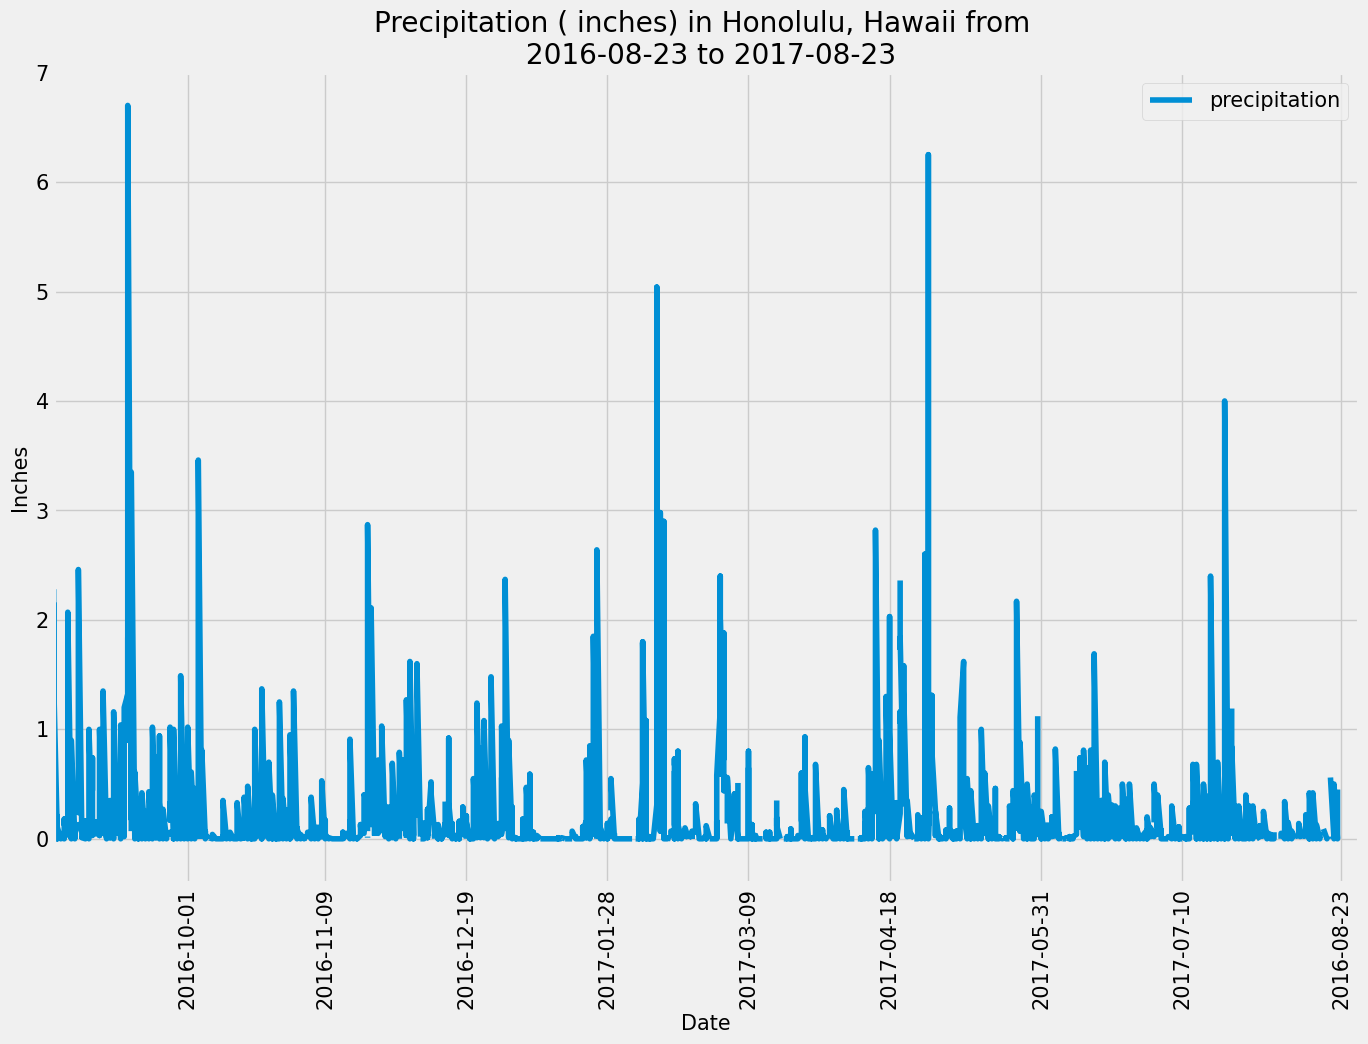

<Figure size 640x480 with 0 Axes>

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
plt.figure(figsize=(15, 10))
plt.plot(sorted_df.index, sorted_df['Precipitation'])

plt.legend(['precipitation'], loc="upper right", fontsize=15)
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']

plt.xticks(xloc, rotation='vertical', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Inches', fontsize=15)
plt.title(f"Precipitation ( inches) in Honolulu, Hawaii from \n {one_yr_earlier_dt} to {recent_date}")
plt.yticks(size=15)

plt.xlim(0,370)
plt.ylim(-0.4,7)

plt.savefig("Resources/Precipitation_Plot.png")

plt.show()
plt.tight_layout()




# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset

station_count = session.query(Station).\
   group_by(Station.station).count()
station_count


9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_activity = session.query(Measurement.station,(func.count(Measurement.station))).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())

station_activity.all()                                                     

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_station_temp = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281')

active_station_temp.first()

('USC00519281', 70.0)

In [44]:
#calculate the lowest, highest, and average temperature.


session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()



[(54.0, 85.0, 71.66378066378067)]

In [49]:
# Using the most active station id
one_yr_earlier = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= one_yr_earlier).all()

#print 
sorted_df = pd.DataFrame(results, columns=['tobs'])
print(sorted_df)


     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


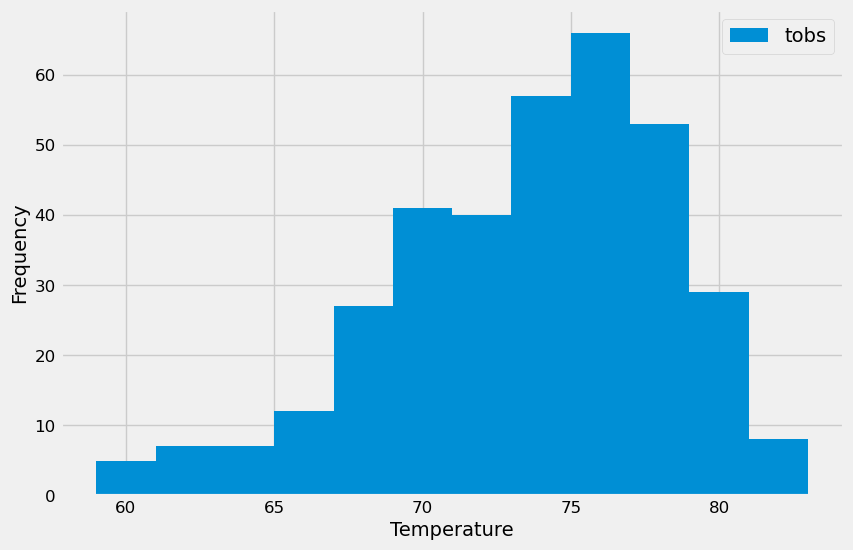

<Figure size 640x480 with 0 Axes>

In [50]:
sorted_df.plot(kind="hist", figsize=(9,6), bins=12, legend=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.savefig("Resources/Station_Histogram.png")

plt.show()
plt.tight_layout()


# Close Session

In [ ]:
# Close Session
session.close()